<a href="https://colab.research.google.com/github/Mostaq27/Data_processing_And_Plotting/blob/main/Student_stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Imports + read CSV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The uploaded file name (change if different)
df = pd.read_csv('Student Stress Factors (2).csv')

print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Loaded 520 rows × 6 columns


,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [2]:
# 2. Clean & process data

# Rename columns for easier handling (remove emojis and standardize)
df.columns = [
    'sleep_quality', 'headaches_freq', 'academic_perf',
    'study_load', 'extracurricular_freq', 'stress_level'
]

# Ensure all columns are numeric
numeric_cols = df.columns.tolist()
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaN (if parsing issues)
df.dropna(inplace=True)

# Basic info
print("Data types:\n", df.dtypes)
print("\nUnique values per column:")
for col in numeric_cols:
    print(f"{col}: {sorted(df[col].unique())}")

df.head()

Data types:
 sleep_quality           int64
headaches_freq          int64
academic_perf           int64
study_load              int64
extracurricular_freq    int64
stress_level            int64
dtype: object

Unique values per column:
sleep_quality: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
headaches_freq: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
academic_perf: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
study_load: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
extracurricular_freq: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
stress_level: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


,sleep_quality,headaches_freq,academic_perf,study_load,extracurricular_freq,stress_level
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [3]:
# 3. Summary stats

df.describe().round(2)

,sleep_quality,headaches_freq,academic_perf,study_load,extracurricular_freq,stress_level
count,520.00,520.00,520.00,520.00,520.00,520.00
mean,3.12,2.18,3.33,2.75,2.68,2.88
std,1.10,1.25,1.06,1.37,1.47,1.36
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,1.00,3.00,2.00,1.00,2.00
50%,3.00,2.00,3.00,2.50,3.00,3.00
75%,4.00,3.00,4.00,4.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00


In [4]:
# 4. Correlation matrix

corr_matrix = df.corr()

# Display as table
corr_matrix.round(2)

,sleep_quality,headaches_freq,academic_perf,study_load,extracurricular_freq,stress_level
sleep_quality,1.00,-0.06,0.25,0.07,0.00,0.17
headaches_freq,-0.06,1.00,-0.21,-0.01,-0.07,-0.07
academic_perf,0.25,-0.21,1.00,0.10,0.15,0.06
study_load,0.07,-0.01,0.10,1.00,0.18,0.39
extracurricular_freq,0.00,-0.07,0.15,0.18,1.00,0.05
stress_level,0.17,-0.07,0.06,0.39,0.05,1.00


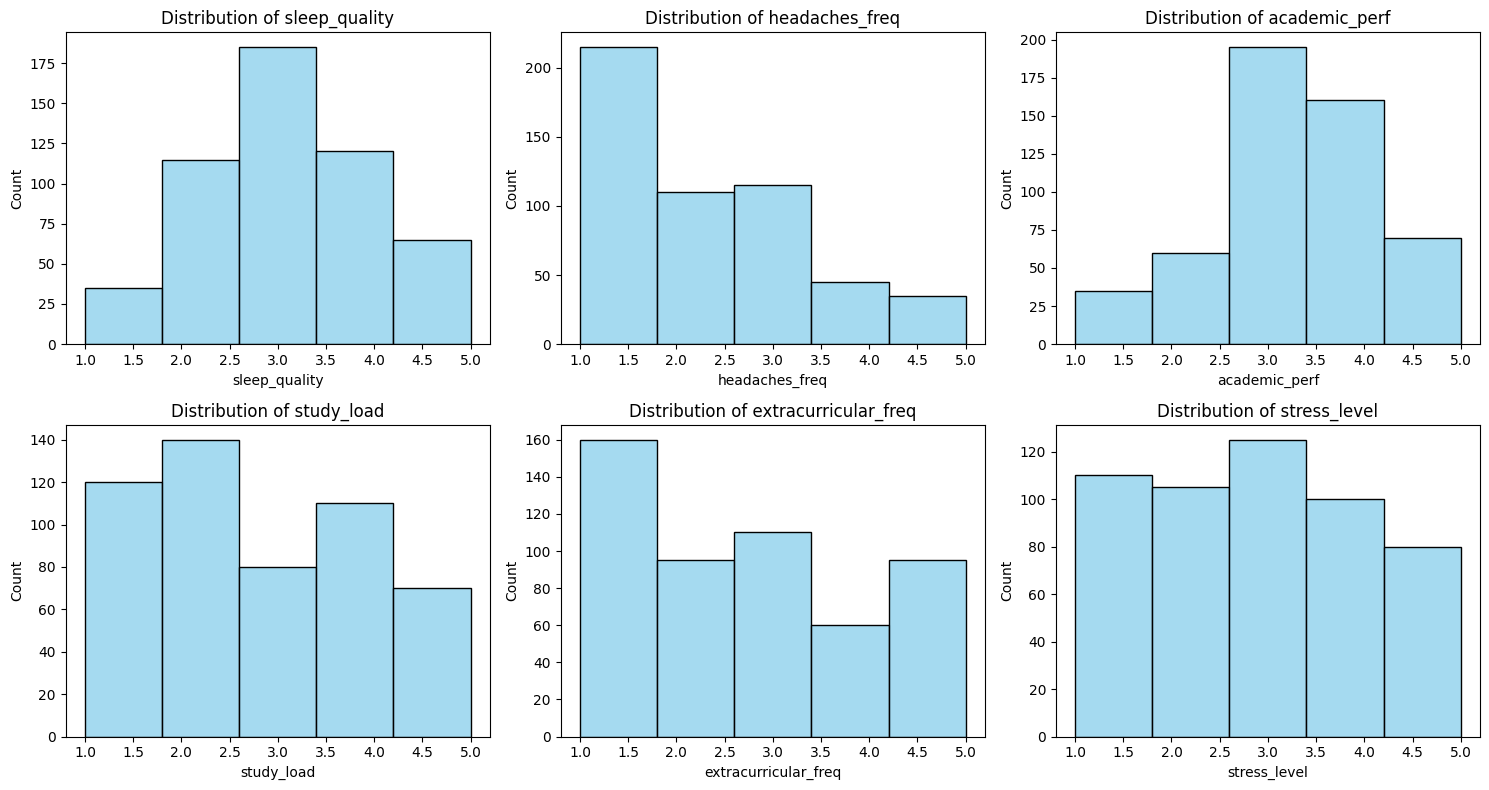

In [5]:
# 5. Plot - Distribution Histograms for Each Variable

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=5, kde=False, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

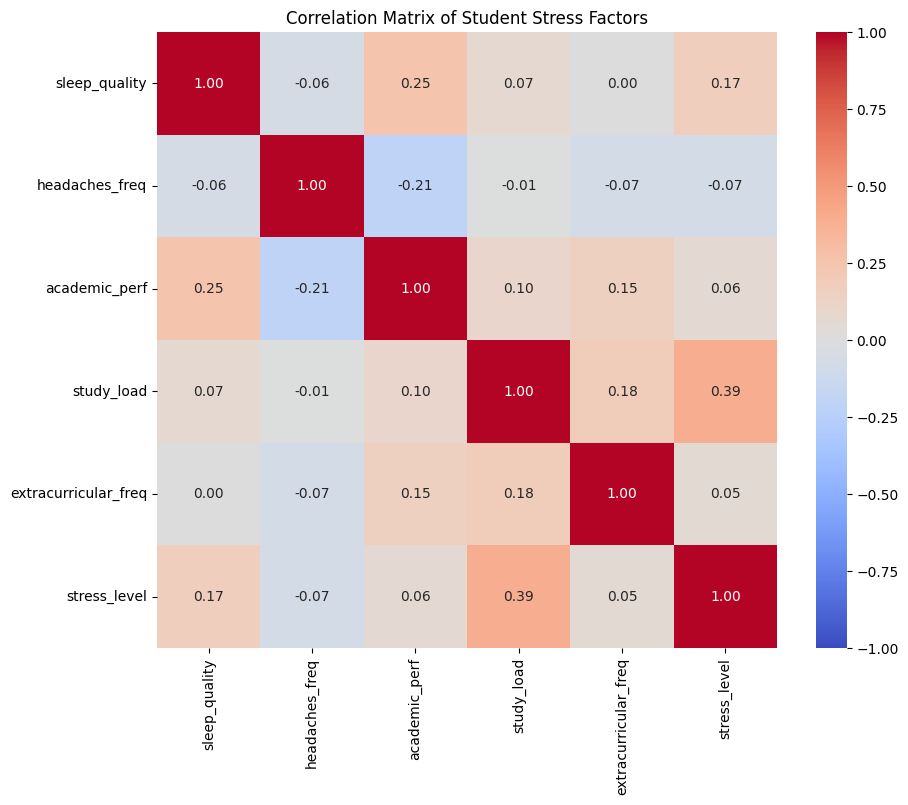

In [6]:
# 6. Plot - Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Student Stress Factors')
plt.show()

/tmp/ipython-input-1073184557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sleep_quality', y='stress_level', palette='viridis')


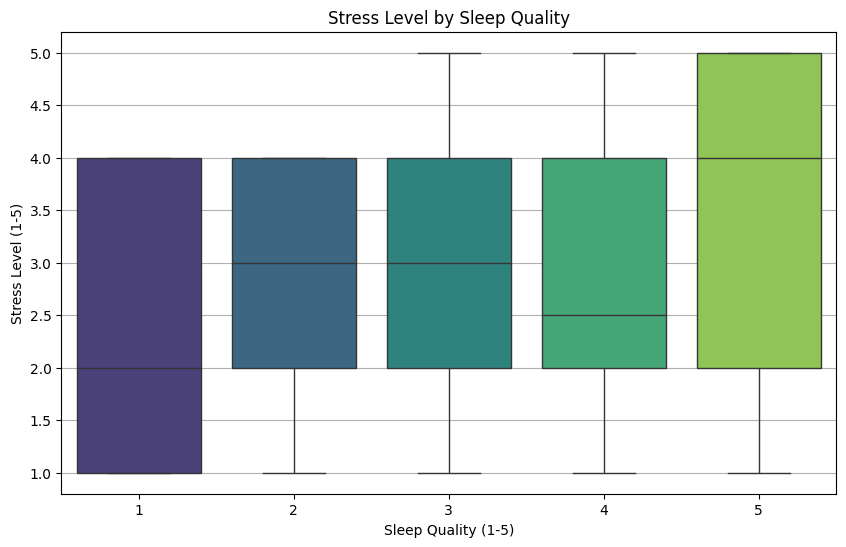

In [7]:
# 7. Plot - Boxplot: Stress Level by Sleep Quality

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sleep_quality', y='stress_level', palette='viridis')
plt.title('Stress Level by Sleep Quality')
plt.xlabel('Sleep Quality (1-5)')
plt.ylabel('Stress Level (1-5)')
plt.grid(axis='y')
plt.show()

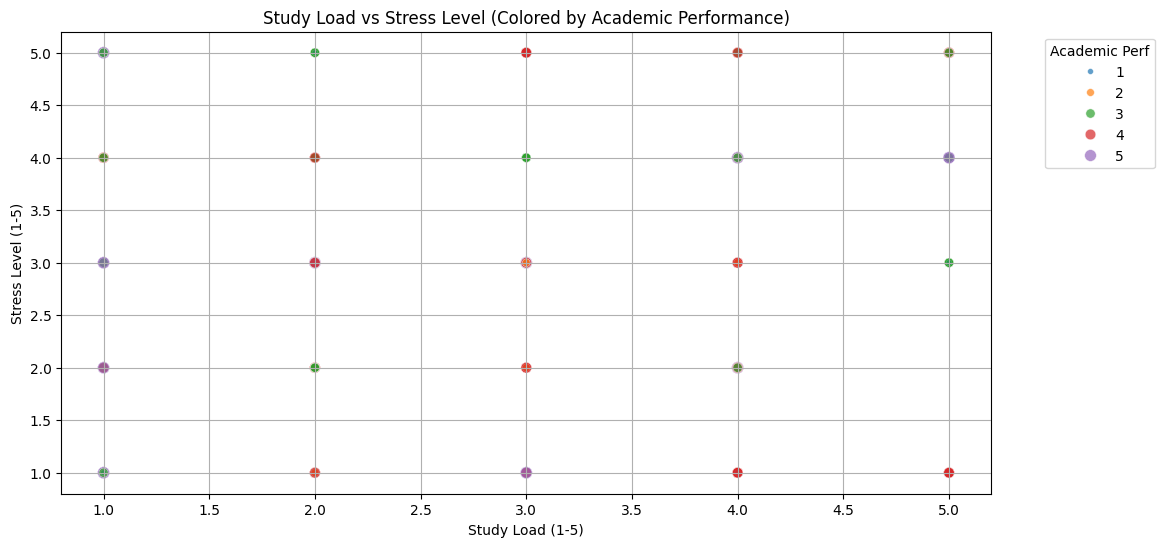

In [8]:
# 8. Plot - Scatter: Study Load vs Stress Level (colored by Academic Performance)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='study_load', y='stress_level', hue='academic_perf', palette='tab10', alpha=0.7, size='academic_perf')
plt.title('Study Load vs Stress Level (Colored by Academic Performance)')
plt.xlabel('Study Load (1-5)')
plt.ylabel('Stress Level (1-5)')
plt.legend(title='Academic Perf', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

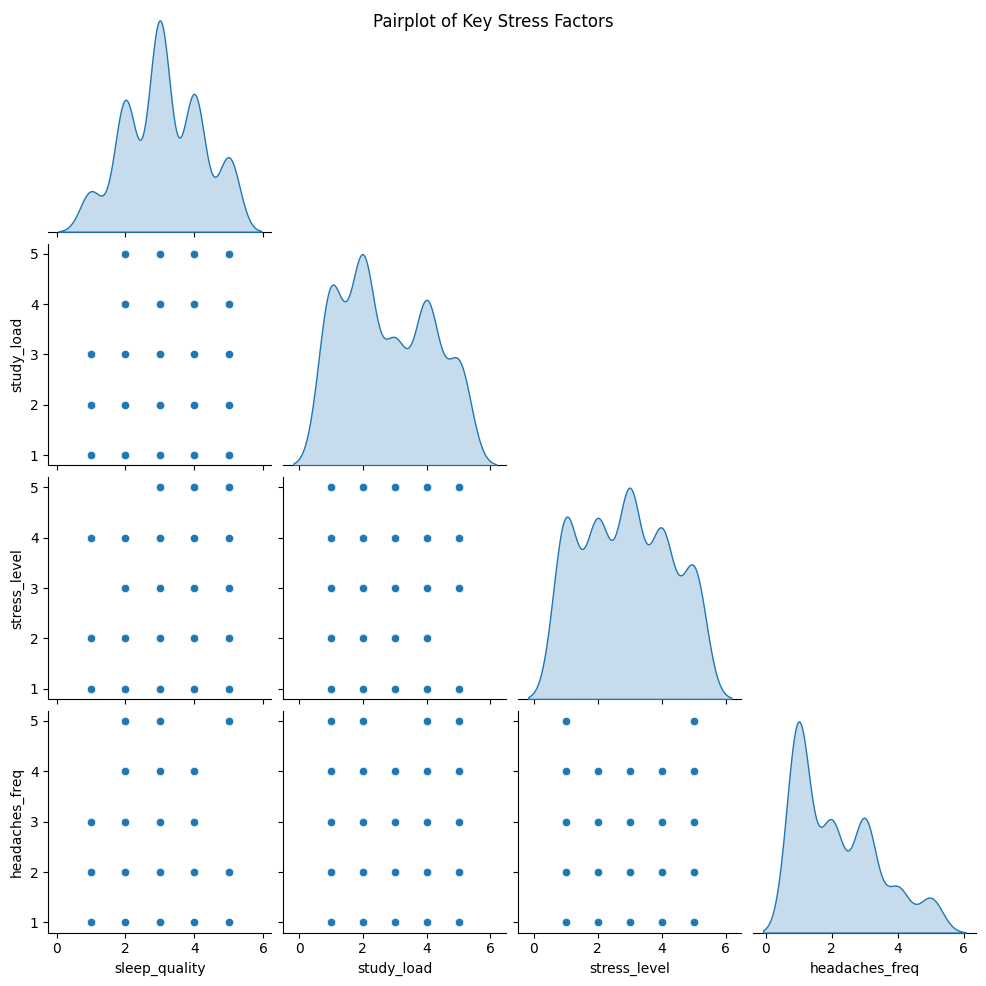

In [9]:
# 9. Plot - Pairplot for Key Relationships

sns.pairplot(df[['sleep_quality', 'study_load', 'stress_level', 'headaches_freq']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Stress Factors')
plt.show()

In [11]:
# 10. (Optional) Save Processed Data

from google.colab import files

df.to_csv('student_stress_cleaned.csv', index=False)
files.download('student_stress_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>